In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
from sklearn.preprocessing import StandardScaler
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# Path assignment
path = r'C:\Users\nodnarb\Documents\Electric Vehicles Project'

In [3]:
# Importing data set
df = pd.read_csv(os.path.join(path, '01 Data', 'kings_county_cleaned_new.csv'), index_col = 0)

#### 1. Data prep

In [5]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,Price Level
0,221900.0,3,1.00,1180,5650,1.0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,Low price
1,538000.0,3,2.25,2570,7242,2.0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,Middle price
2,180000.0,2,1.00,770,10000,1.0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,Low price
3,604000.0,4,3.00,1960,5000,1.0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,Middle price
4,510000.0,3,2.00,1680,8080,1.0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,Middle price


In [6]:
# Transforming yr_renovated into binary value
def renovated(row):
    if row['yr_renovated'] > 0:
        return '1'
    else: return '0'

df['renovated'] = df.apply(renovated, axis=1)

In [7]:
# Transforming sqft_basement into binary value
def basement(row):
    if row['sqft_basement'] > 0:
        return '1'
    else: return '0'

df['basement'] = df.apply(basement, axis=1)

In [8]:
# Transforming yr_built into age
df['age'] = 2024 - df['yr_built']

In [9]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,Price Level,renovated,basement,age
0,221900.0,3,1.00,1180,5650,1.0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,Low price,0,0,69
1,538000.0,3,2.25,2570,7242,2.0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,Middle price,1,1,73
2,180000.0,2,1.00,770,10000,1.0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,Low price,0,0,91
3,604000.0,4,3.00,1960,5000,1.0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,Middle price,0,1,59
4,510000.0,3,2.00,1680,8080,1.0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,Middle price,0,0,37


In [10]:
# Dropping columns
df1 = df.drop(columns = ['sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'Price Level'])

In [11]:
df1.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,renovated,basement,age
0,221900.0,3,1.00,1180,5650,1.0,0,3,7,1180,0,0,69
1,538000.0,3,2.25,2570,7242,2.0,0,3,7,2170,1,1,73
2,180000.0,2,1.00,770,10000,1.0,0,3,6,770,0,0,91
3,604000.0,4,3.00,1960,5000,1.0,0,5,7,1050,0,1,59
4,510000.0,3,2.00,1680,8080,1.0,0,3,8,1680,0,0,37


In [12]:
# Standardizing data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df1)

#### 2. Elbow technique

In [14]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [15]:
score = [kmeans[i].fit(scaled_data).score(scaled_data) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-280904.0000000001,
 -215967.11130713235,
 -195007.91256431892,
 -172861.03718847217,
 -165667.49321993778,
 -146852.73733097804,
 -122542.95091205288,
 -121891.71487247336,
 -110096.0352873438]

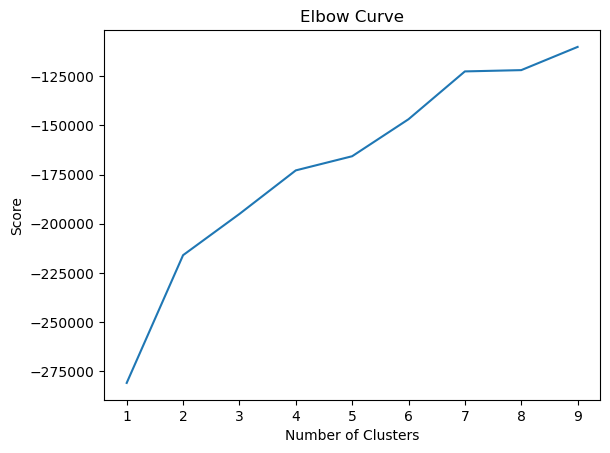

In [16]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

The largest jump occurs between 2 and 3. After 4, the curve starts to straighten out. This means the optimal count for the clusters is 3.

#### 3. K-means clustering

In [19]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [20]:
# Fit the k-means object to the data.

kmeans.fit(df1)

KMeans(n_clusters=3)

In [21]:
df1['clusters'] = kmeans.fit_predict(scaled_data)

In [22]:
df1.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,renovated,basement,age,clusters
0,221900.0,3,1.00,1180,5650,1.0,0,3,7,1180,0,0,69,0
1,538000.0,3,2.25,2570,7242,2.0,0,3,7,2170,1,1,73,1
2,180000.0,2,1.00,770,10000,1.0,0,3,6,770,0,0,91,0
3,604000.0,4,3.00,1960,5000,1.0,0,5,7,1050,0,1,59,1
4,510000.0,3,2.00,1680,8080,1.0,0,3,8,1680,0,0,37,0


In [23]:
df1['clusters'].value_counts()

clusters
2    7688
0    7377
1    6543
Name: count, dtype: int64

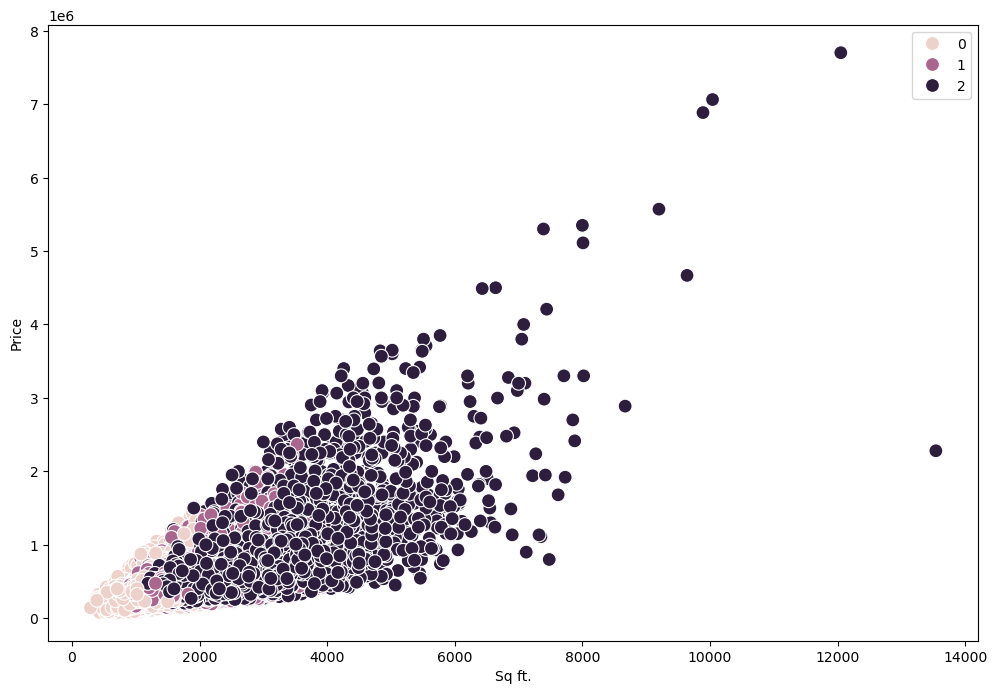

In [24]:
# Plot the clusters for the "price" and "sqft_living" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df1['sqft_living'], y=df1['price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Sq ft.') # Label x-axis.
plt.ylabel('Price') # Label y-axis.
plt.show()

1. Cluster 0 resembles properties between 500,000 and 1 million with less than 6000 sqft.
2. Cluster 1 resembles properties over 2 million and greater than 3000 sqft.
3. Cluster 2 resembles properties between 1 and 2 million over 1000 sqft. 
4. Cluster 3 resembles properties between 0 and 500,000 under 5000 sqft. 

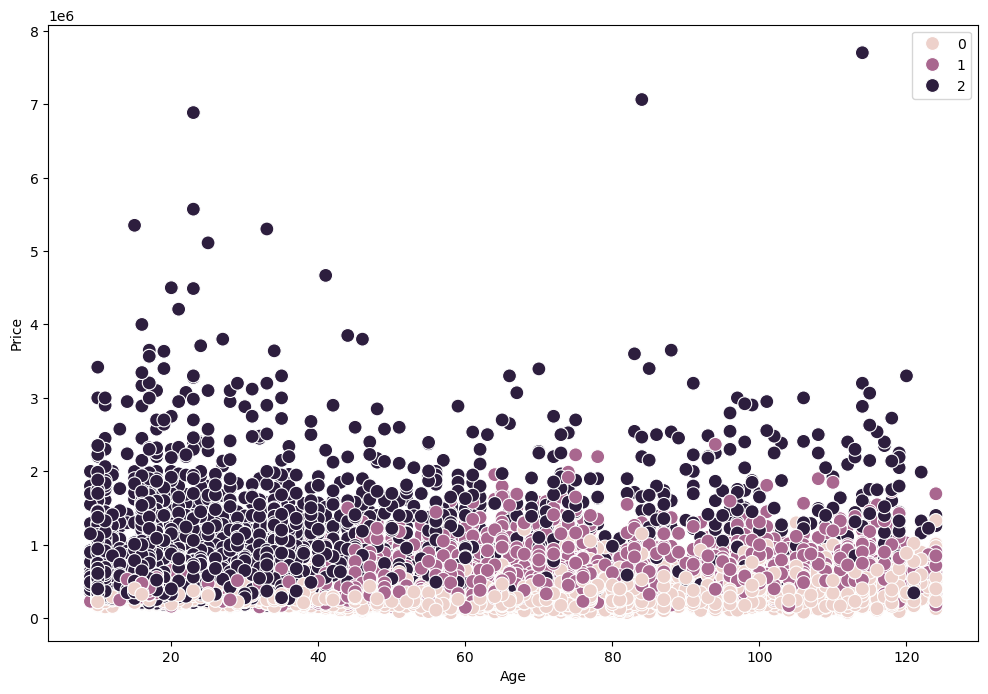

In [26]:
# Plot the clusters for the "price" and "age" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df1['age'], y=df1['price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Age') # Label x-axis.
plt.ylabel('Price') # Label y-axis.
plt.show()

Cluster 2 stands out where there are slightly more newer homes that have a higher price point than older homes. 

Cluster 0,1 and 3 have no minimal differences in price based on age.

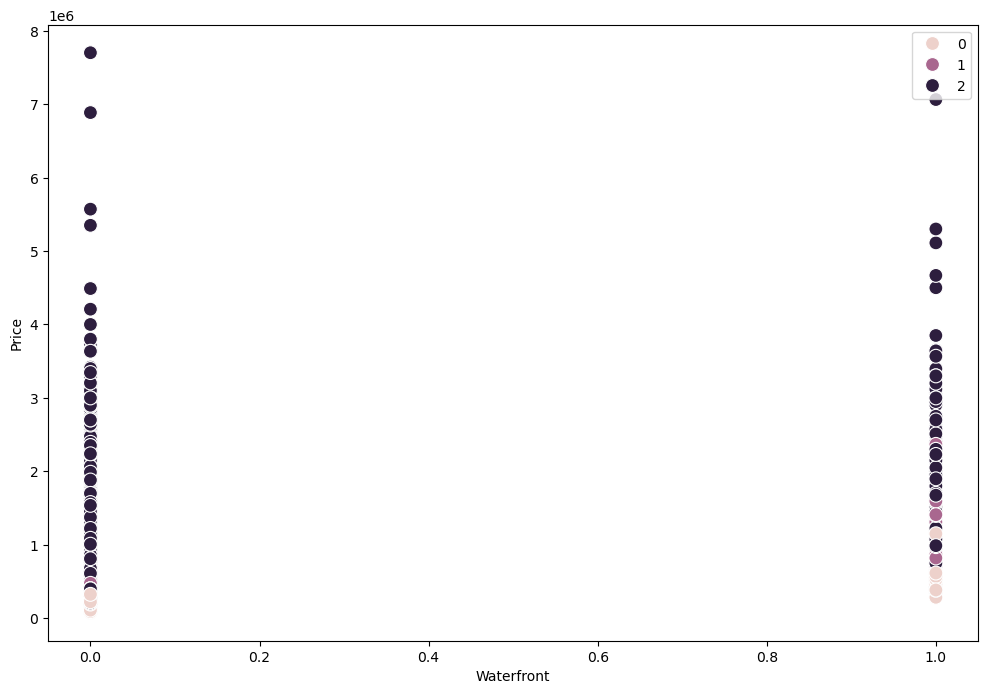

In [28]:
# Plot the clusters for the "price" and "waterfront" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df1['waterfront'], y=df1['price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Waterfront') # Label x-axis.
plt.ylabel('Price') # Label y-axis.
plt.show()

Cluster 0 has slightly more properties without a waterfront view.

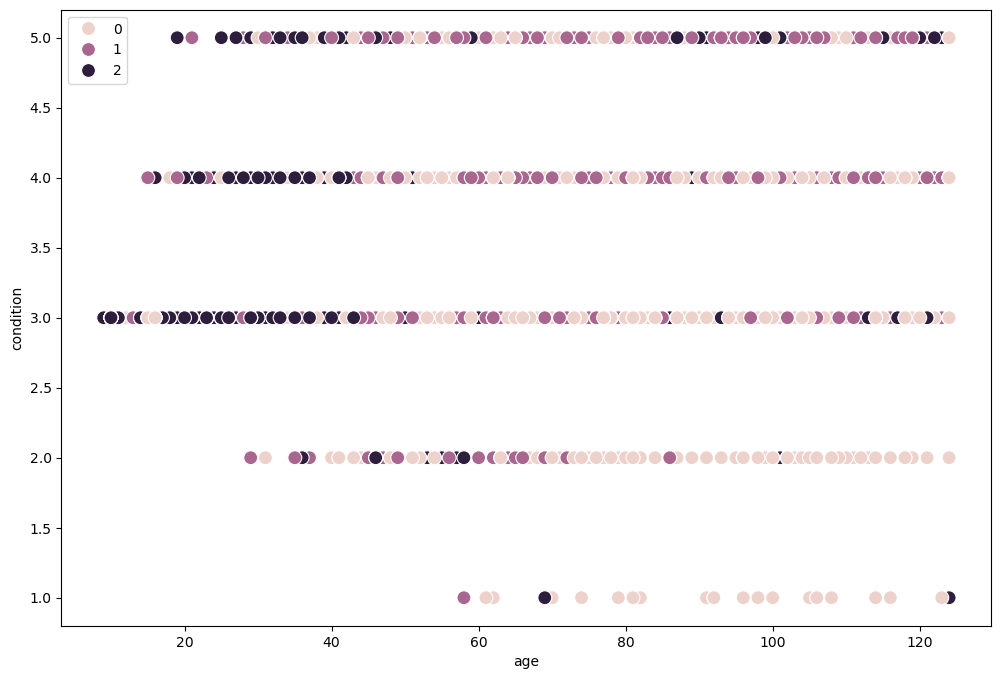

In [30]:
# Plot the clusters for the "condition" and "age" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df1['age'], y=df1['condition'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('age') # Label x-axis.
plt.ylabel('condition') # Label y-axis.
plt.show()

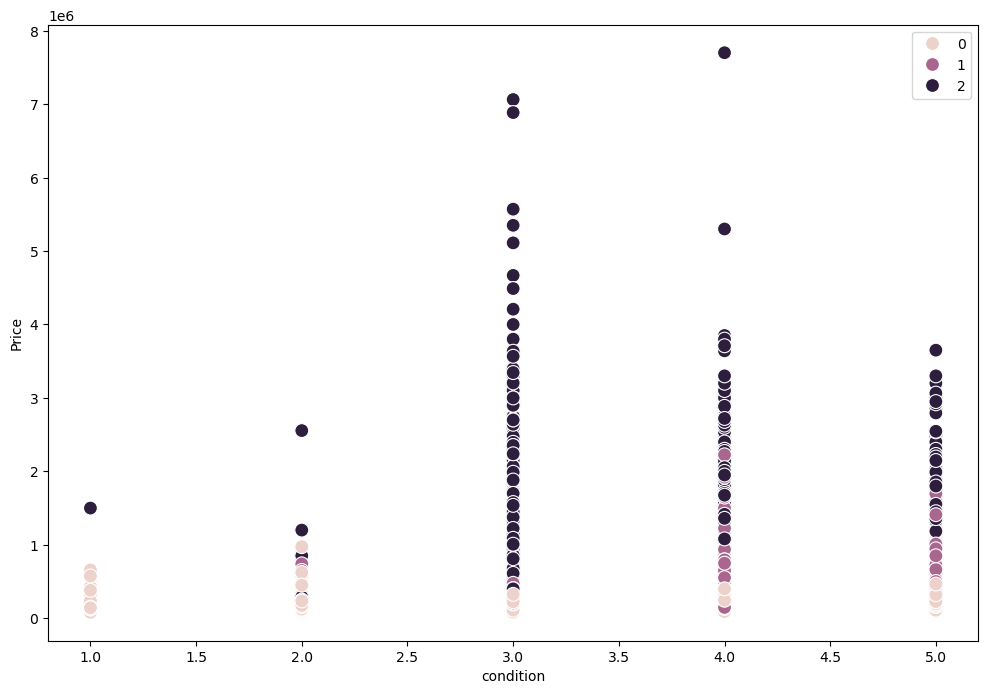

In [31]:
# Plot the clusters for the "price" and "condition" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df1['condition'], y=df1['price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('condition') # Label x-axis.
plt.ylabel('Price') # Label y-axis.
plt.show()

#### 4. Descriptive statistics

In [33]:
df1.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,renovated,basement,age,clusters
0,221900.0,3,1.00,1180,5650,1.0,0,3,7,1180,0,0,69,0
1,538000.0,3,2.25,2570,7242,2.0,0,3,7,2170,1,1,73,1
2,180000.0,2,1.00,770,10000,1.0,0,3,6,770,0,0,91,0
3,604000.0,4,3.00,1960,5000,1.0,0,5,7,1050,0,1,59,1
4,510000.0,3,2.00,1680,8080,1.0,0,3,8,1680,0,0,37,0


In [34]:
# Checking dtypes
df1.dtypes

price          float64
bedrooms         int64
bathrooms      float64
sqft_living      int64
sqft_lot         int64
floors         float64
waterfront       int64
condition        int64
grade            int64
sqft_above       int64
renovated       object
basement        object
age              int64
clusters         int32
dtype: object

In [35]:
df1['basement'] = df1['basement'].astype(int)
df1['renovated'] = df1['renovated'].astype(int)

In [36]:
df1.loc[df1['clusters'] == 3, 'cluster'] = 'dark purple'
df1.loc[df1['clusters'] == 2, 'cluster'] = 'purple'
df1.loc[df1['clusters'] == 1, 'cluster'] = 'light purple'
df1.loc[df1['clusters'] == 0, 'cluster'] = 'pink'

In [37]:
# Display all columns
pd.set_option('display.max_columns', None)

df1.groupby('cluster').agg({
    'price':['mean', 'median'], 
    'bedrooms':['mean', 'median'], 
    'bathrooms':['mean', 'median'],
    'sqft_living':['mean', 'median'],
    'sqft_lot':['mean', 'median'], 
    'floors':['mean', 'median'],
    'waterfront':['mean', 'median'],
    'condition':['mean', 'median'],
    'grade':['mean', 'median'],
    'sqft_above':['mean', 'median'], 
    'renovated':['mean', 'median'],
    'age':['mean', 'median'],
    'basement':['mean', 'median']})

price            bedrooms        bathrooms         \
                       mean    median      mean median      mean median   
cluster                                                                   
light purple  525258.712976  480000.0  3.561210    3.0  2.130941    2.0   
pink          358867.920022  329000.0  2.784059    3.0  1.440152    1.5   
purple        726627.101067  600000.0  3.772112    4.0  2.748244    2.5   

              sqft_living              sqft_lot            floors         \
                     mean  median          mean  median      mean median   
cluster                                                                    
light purple  2088.120281  2030.0  11596.419685  7680.0  1.187223    1.0   
pink          1322.595093  1300.0  12622.226515  7500.0  1.223058    1.0   
purple        2799.739594  2630.0  20486.348855  7709.5  2.015479    2.0   

             waterfront        condition            grade          sqft_above  \
                   mean median      mean median      mean median         mean   
cluster                                                                         
light purple   0.006113    0.0  3.619899    3.0  7.451628    7.0  1376.116613   
pink           0.003118    0.0  3.485292    3.0  6.806290    7.0  1297.555646   
purple         0.013007    0.0  3.157648    3.0  8.647112    8.0  2610.310744   

                     renovated               age         basement         
              median      mean median       mean median      mean median  
cluster                                                                   
light purple  1320.0  0.048754    0.0  62.833410   61.0  0.978145    1.0  
pink          1270.0  0.042158    0.0  68.020333   68.0  0.072387    0.0  
purple        2500.0  0.036811    0.0  30.218652   25.0  0.201743    0.0

#### 5. Insights

**Light Purple:**
- Price: The most expensive homes. Average: 2.8 million
- Sqft: Highest square footage. Average 5094 sqft.
- Sqft lot: Highest sqft. Average 15972 sqft.
- Waterfront: The highest average with .23.
- Grade: Highest grade. Average 10.75
- Sqft above: Highest sqft. Average 3840 sqft.
- Age: Lowest age, relatively newer homes. Median 37.5
- Basement: Has basements compared to pink and purple

Light purple homes have the highest average price per proerty so we will use the averages as a benchmark. It highest averages in most categories such as square footage, waterfront features and grade.

Following light purple is purple which sees a much lower price point than dark purple with an average of 1.35 million. This is supported by the lower averages in the same categories mentioned above. 

Following light purple are pink and dark purple, respectively, with each having declining averages that would support the lower price points for properties in each cluster. 

**Key Insights**
1. Square foot living, square foot above, waterfront, bedroom and bathrooms have the most noticable average differences among the clusters.
2. Whether it was renovated, condition and number of floors seem to have the least average differences among the clusters.

In [40]:
df1.to_csv(os.path.join(path, '01 Data', 'kings_county_cleaned11.csv'))

In [73]:
df1['clusters'].value_counts()

clusters
2    7688
0    7377
1    6543
Name: count, dtype: int64